## Plots and Stats

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load parsed text data**

In [2]:
with open("./pickled_data/all_dfs.dat", "rb") as f:
    all_dfs = pickle.load(f)
    
#unpack all_dfs
df_final, df_95, df_96, df_97, df_98, df_99, df_100, df_101, df_102,  df_103,  df_104,  df_105,  df_106,  df_107,  df_108, df_109,  df_110,  df_111 = all_dfs

all_dfs_complete = all_dfs[1]
all_dfs = all_dfs[1:]

In [3]:
df_final['congress'] = df_final['congress'].astype(int)
df_final = df_final.sort_values(by="congress")

### Ideology

In [4]:
#renaming for plot
df_final['congress'] = df_final['congress'].astype(int)
df_final['Ideology'] = df_final['ideo_vec_ext']
df_final['Ideology'] = df_final['Ideology'].astype(str)
df_final['log_speech_length'] = np.log2(df_final['speech_length'])
df_final['Ideology'] = df_final['Ideology'].str.replace('-1', 'Liberal')
df_final['Ideology'] = df_final['Ideology'].str.replace('0', 'Moderate')
df_final['Ideology'] = df_final['Ideology'].str.replace('1', 'Conservative')

Text(0.5, 0, 'Congressional Session')

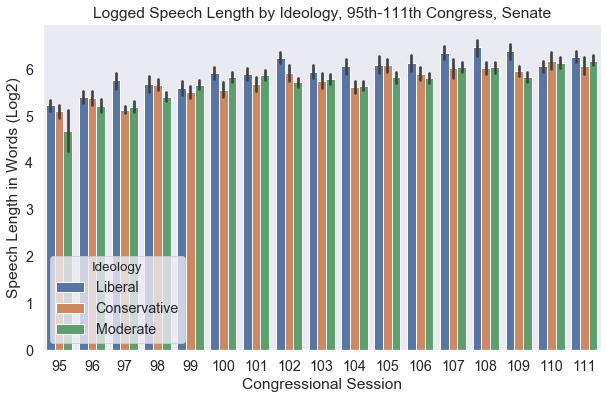

In [5]:
sns.set(font_scale=1.3) 

df_final = df_final[df_final['Ideology']!="NA"]
sns.set_style("dark")

labels=['Liberal', 'Moderate','Conservative']

fig = plt.figure(figsize=(10,6))
fig.set_size_inches(10,6)

g = sns.barplot(x = "congress", y="log_speech_length", hue = "Ideology", data = df_final)

plt.title("Logged Speech Length by Ideology, 95th-111th Congress, Senate")
plt.ylabel("Speech Length in Words (Log2)")
plt.xlabel("Congressional Session")
   
# plt.savefig('./speech_len_ideo-house-log2.png', dpi=500)

Text(0.5, 0, 'Congressional Session')

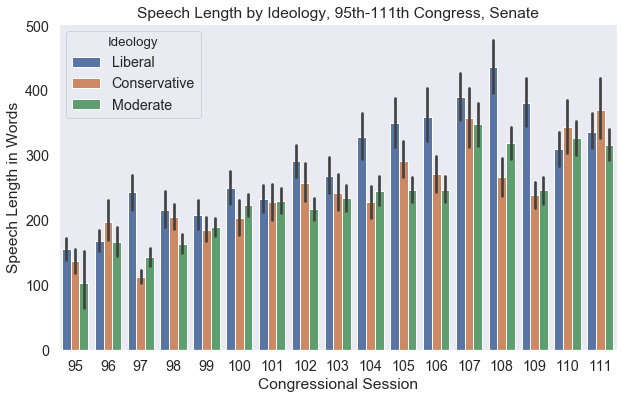

In [6]:
sns.set(font_scale=1.3) 

df_final = df_final[df_final['Ideology']!="NA"]
sns.set_style("dark")

labels=['Liberal', 'Moderate','Conservative']

fig = plt.figure(figsize=(10,6))
fig.set_size_inches(10,6)

g = sns.barplot(x = "congress", y="speech_length", hue = "Ideology", data = df_final)

plt.title("Speech Length by Ideology, 95th-111th Congress, Senate")
plt.ylabel("Speech Length in Words")
plt.xlabel("Congressional Session")
   
# plt.savefig('./speech_len_ideo-house.png', dpi=500)

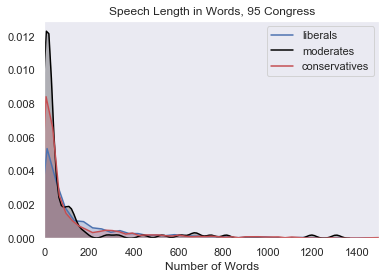

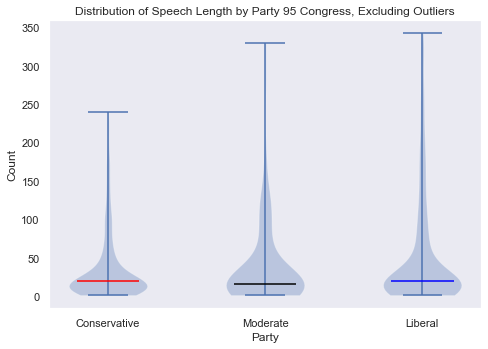

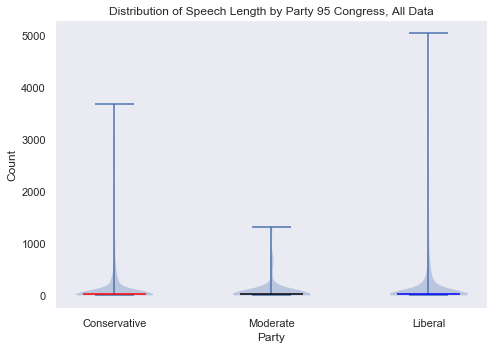

(<matplotlib.axes._subplots.AxesSubplot at 0x1a28466e90>,
 <Figure size 432x288 with 1 Axes>,
 {'bodies': [<matplotlib.collections.PolyCollection at 0x1a20e2d0d0>,
  'cmaxes': <matplotlib.collections.LineCollection at 0x1a20e2d110>,
  'cmins': <matplotlib.collections.LineCollection at 0x1a20e63c90>,
  'cbars': <matplotlib.collections.LineCollection at 0x1a20e63450>})

In [7]:
sns.set(font_scale=1) 
sns.set_style("dark")

def plots_ideology(df_c, ideo_col):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy import stats
    from statistics import mean, median

    congress = df_c.congress.unique()[0]
    
    ideo_vec_ext_speeches = df_c.groupby([ideo_col])
    lib = df_c[df_c[ideo_col]==-1]
    mod = df_c[df_c[ideo_col]==0]
    con = df_c[df_c[ideo_col]==1]
    
    
    ################################################
    
    #desnity plot distribution of speech length
    p1=sns.kdeplot(lib['speech_length'], shade=True, color="b", label='liberals')
    p1=sns.kdeplot(mod['speech_length'], shade=True, color="black", label='moderates')
    p1=sns.kdeplot(con['speech_length'], shade=True, color="r", label='conservatives')
    #plt.ylabel('Percent')
    plt.xlabel('Number of Words')
    plt.title('Speech Length in Words, {} Congress'.format(congress))
    plt.xlim(0, 1500)
#     plt.savefig('./senate_images/speech/{}-senate.png'.format(congress), dpi=500)


    ################################################
    
    #violinplot without outliers
    Q1 = lib['speech_length'].quantile(0.25)
    Q3 = lib['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (lib['speech_length'] >= Q1 - 1.5 * IQR) & (lib['speech_length'] <= Q3 + 1.5 *IQR)
    ob = lib['speech_length'].loc[filter]  

    Q1 = lib['speech_length'].quantile(0.25)
    Q3 = lib['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (mod['speech_length'] >= Q1 - 1.5 * IQR) & (mod['speech_length'] <= Q3 + 1.5 *IQR)
    ob_mod = mod['speech_length'].loc[filter]  
    
    
    Q1 = con['speech_length'].quantile(0.25)
    Q3 = con['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (con['speech_length'] >= Q1 - 1.5 * IQR) & (con['speech_length'] <= Q3 + 1.5 *IQR)
    ob_m = con['speech_length'].loc[filter] 
    
        ## combine these different collections into a list
    data_to_plot = [list(ob_m), list(ob_mod), list(ob)]

        # Create a figure instance
    fig = plt.figure()

        # Create an axes instance
    ax = fig.add_axes([1,1,1,1])

        # Create the violinplots
    bp = ax.violinplot(data_to_plot)

    plt.hlines(median(ob), color='blue', xmin=2.8, xmax=3.2)
    plt.hlines(median(ob_mod), color='black', xmin=1.8, xmax=2.2)
    plt.hlines(median(ob_m), color='red', xmin=.8, xmax=1.2)
    plt.ylabel('Count')
    plt.xlabel('Party')
    plt.title('Distribution of Speech Length by Party {} Congress, Excluding Outliers'.format(congress))
    
    plt.xticks([1,2, 3], ["Conservative", "Moderate", "Liberal"])
#     plt.savefig('./senate_images/vio_speech/{}-senate.png'.format(congress), dpi=500)
    plt.show()
    plt.close()
    
    ################################################
    #violinplot, all data
    import statistics
    
    data_to_plot2 = [list(con['speech_length']), list(mod['speech_length']), list(lib['speech_length'])]

    # Create a figure instance
    fig2 = plt.figure()

    # Create an axes instance
    ax2 = fig2.add_axes([1,1,1,1])

    # Create the boxplot
    bp2 = ax2.violinplot(data_to_plot2)
    
    plt.hlines(median(data_to_plot2[1]), color='blue', xmin=2.8, xmax=3.2)
    plt.hlines(median(data_to_plot2[1]), color='black', xmin=1.8, xmax=2.2)
    plt.hlines(median(data_to_plot2[0]), color='red', xmin=.8, xmax=1.2)

    plt.ylabel('Count')
    plt.xlabel('Party')
    plt.title('Distribution of Speech Length by Party {} Congress, All Data'.format(congress))
    plt.xticks([1,2, 3], ["Conservative", "Moderate", "Liberal"])
#     plt.savefig('./senate_images/all_speech/{}-senate.png'.format(congress), dpi=500)
    plt.show()
    plt.close()
    
    return p1, fig, bp2

plots_ideology(df_95, 'ideo_vec_ext')

(0, 70)

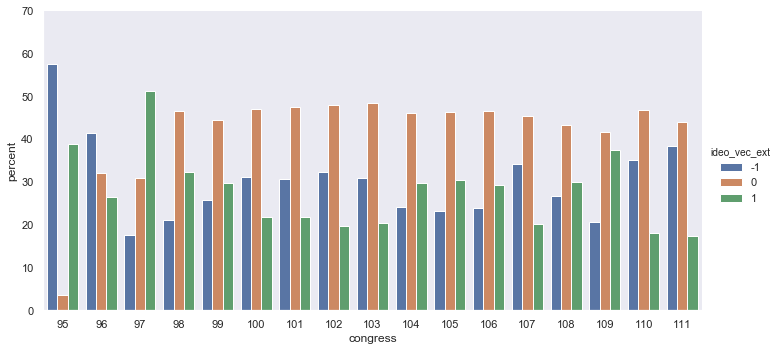

In [8]:
x,y = 'congress', 'ideo_vec_ext'

df1 = df_final[df_final[y]!="NA"]
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, aspect=2)
g.ax.set_ylim(0,70)

### Political Party

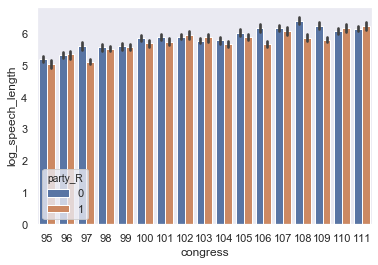

In [9]:
sns.barplot(x = "congress", y="log_speech_length", hue = "party_R", data = df_final)

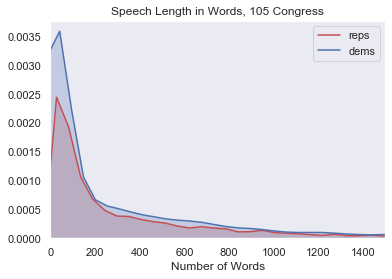

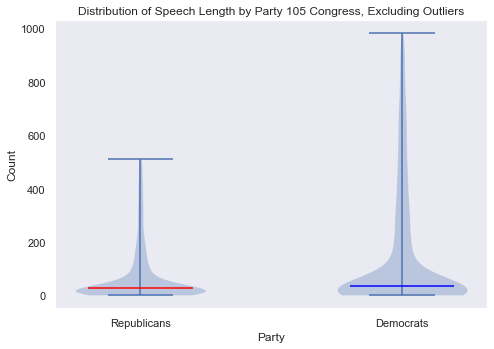

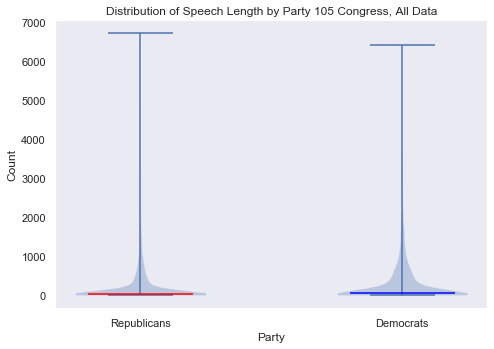

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1dda5150>,
 <Figure size 432x288 with 1 Axes>,
 {'bodies': [<matplotlib.collections.PolyCollection at 0x1a1dbe8a10>,
  'cmaxes': <matplotlib.collections.LineCollection at 0x1a1dbe8590>,
  'cmins': <matplotlib.collections.LineCollection at 0x1a1dbf5050>,
  'cbars': <matplotlib.collections.LineCollection at 0x1a1dbf5110>})

In [10]:
def plots_party_R(df_c):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy import stats
    from statistics import mean, median

    
    congress = df_c.congress.unique()[0]
    party_R_speeches = df_c.groupby(['party_R'])
    dem = df_c[df_c['party_R']==0]
    rep = df_c[df_c['party_R']==1]
    
    #mean length 
#     mean_length = df_c.groupby('party_R').speech_length.mean() #return
    
    
    ################################################
    
    #desnity plot distribution of speech length
    p1=sns.kdeplot(rep['speech_length'], shade=True, color="r", label='reps')
    p1=sns.kdeplot(dem['speech_length'], shade=True, color="b", label='dems')
    #plt.ylabel('Percent')
    plt.xlabel('Number of Words')
    plt.title('Speech Length in Words, {} Congress'.format(congress))
    plt.xlim(0, 1500)
    
    ################################################
    
    #violinplot without outliers
    Q1 = dem['speech_length'].quantile(0.25)
    Q3 = dem['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (dem['speech_length'] >= Q1 - 1.5 * IQR) & (dem['speech_length'] <= Q3 + 1.5 *IQR)
    ob = dem['speech_length'].loc[filter]  ####here

    Q1 = rep['speech_length'].quantile(0.25)
    Q3 = rep['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (rep['speech_length'] >= Q1 - 1.5 * IQR) & (rep['speech_length'] <= Q3 + 1.5 *IQR)
    ob_m = rep['speech_length'].loc[filter] ####here
    
        ## combine these different collections into a list
    data_to_plot = [list(ob_m), list(ob)]

        # Create a figure instance
    fig = plt.figure()

        # Create an axes instance
    ax = fig.add_axes([1,1,1,1])

        # Create the violinplots
    bp = ax.violinplot(data_to_plot)

    plt.hlines(median(ob), color='blue', xmin=1.8, xmax=2.2)
    plt.hlines(median(ob_m), color='red', xmin=.8, xmax=1.2)
    plt.ylabel('Count')
    plt.xlabel('Party')
    plt.title('Distribution of Speech Length by Party {} Congress, Excluding Outliers'.format(congress))
    
    plt.xticks([1,2], ["Republicans", "Democrats"])
    plt.show()
    
    ################################################
    #violinplot, all data
    import statistics
    
    data_to_plot2 = [list(rep['speech_length']), list(dem['speech_length'])]

    # Create a figure instance
    fig2 = plt.figure()

    # Create an axes instance
    ax2 = fig2.add_axes([1,1,1,1])

    # Create the boxplot
    bp2 = ax2.violinplot(data_to_plot2)
    
    plt.hlines(median(data_to_plot2[1]), color='blue', xmin=1.8, xmax=2.2)
    plt.hlines(median(data_to_plot2[0]), color='red', xmin=.8, xmax=1.2)

    plt.ylabel('Count')
    plt.xlabel('Party')
    plt.title('Distribution of Speech Length by Party {} Congress, All Data'.format(congress))
    plt.xticks([1,2], ["Republicans", "Democrats"])
    plt.show()
    
    ################################################
    
    return p1, fig, bp2, 

plots_party_R(df_105)

### Gender

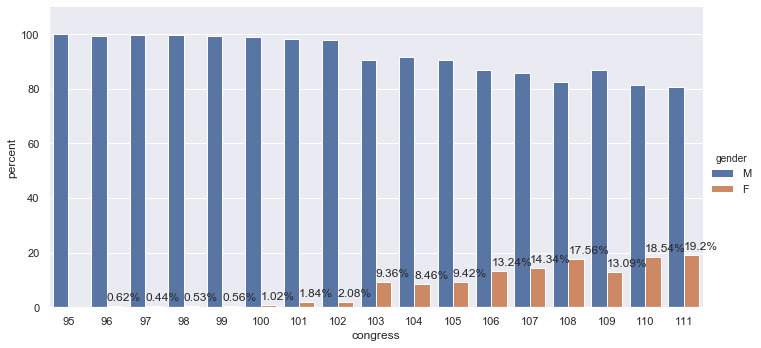

In [11]:
sns.set(font_scale=1) 

x,y = 'congress', 'gender'

df1 = df_final.groupby('congress')['gender'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, aspect=2)
g.ax.set_ylim(0,110)



for p in g.ax.patches[18:]:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 2
    g.ax.text(txt_x,txt_y,txt, 
        #fontweight='bold', 
        size=12)

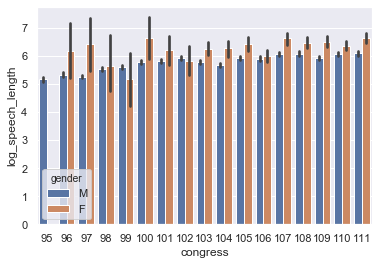

In [12]:
sns.barplot(x = "congress", y="log_speech_length", hue = "gender", data = df_final)

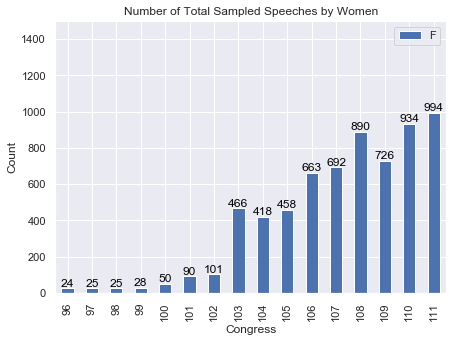

In [13]:
plot_df = df_final[df_final['gender']=="F"]
plot_values = plot_df.groupby(['congress']).gender.value_counts()
plot_values = plot_values.unstack()
plot_values.sort_values(by=['congress'])
plot_values.plot(kind='bar', figsize=(7, 5))
plt.ylabel('Count')
plt.xlabel('Congress')
plt.title('Number of Total Sampled Speeches by Women')
plt.ylim(0, 1500)
plt.legend(loc='bottom left')

# add labels
ax = plt.gca()


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

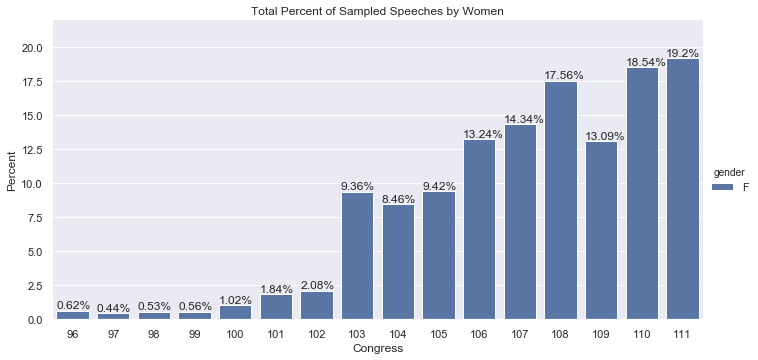

In [14]:
x,y = 'congress', 'gender'

df1 = df_final.groupby('congress')['gender'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1 = df1[df1['gender']=='F']


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, aspect=2)
g.ax.set_ylim(0,22)
plt.ylabel('Percent')
plt.xlabel('Congress')
plt.title('Total Percent of Sampled Speeches by Women')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + .2
    g.ax.text(txt_x,txt_y,txt, 
        #fontweight='bold', 
        size=12)


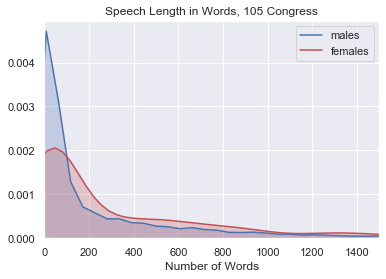

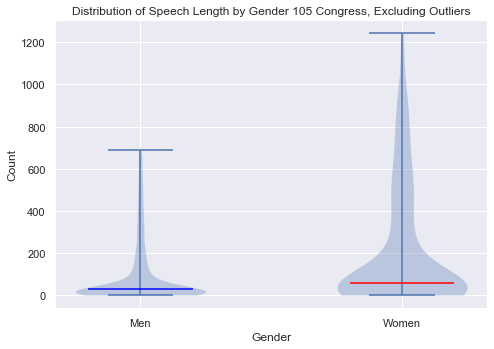

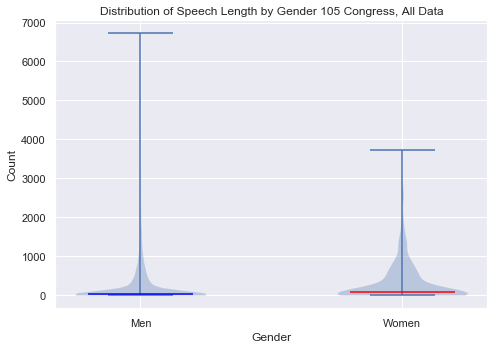

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1e914ed0>,
 <Figure size 432x288 with 1 Axes>,
 {'bodies': [<matplotlib.collections.PolyCollection at 0x1a2d2fb910>,
  'cmaxes': <matplotlib.collections.LineCollection at 0x1a2ac040d0>,
  'cmins': <matplotlib.collections.LineCollection at 0x1a20e56050>,
  'cbars': <matplotlib.collections.LineCollection at 0x1a20e561d0>})

In [15]:
def plots_gender(df_c):
    import seaborn as sns
    import matplotlib 
    from scipy import stats
    from statistics import mean, median

    congress = df_c.congress.unique()[0]
    gender_speeches = df_c.groupby(['gender'])
    female = df_c[df_c['gender']=="F"]
    male = df_c[df_c['gender']=="M"]
    
    #mean length 
    #mean_length = df_c.groupby('gender').speech_length.mean() #return
    
    
    ################################################
    
    #desnity plot distribution of speech length
    p1=sns.kdeplot(male['speech_length'], shade=True, color="b", label='males')
    p1=sns.kdeplot(female['speech_length'], shade=True, color="r", label='females')
    #plt.ylabel('Percent')
    plt.xlabel('Number of Words')
    plt.title('Speech Length in Words, {} Congress'.format(congress))
    plt.xlim(0, 1500)
    
    ################################################
    
    #violinplot without outliers
    Q1 = female['speech_length'].quantile(0.25)
    Q3 = female['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (female['speech_length'] >= Q1 - 1.5 * IQR) & (female['speech_length'] <= Q3 + 1.5 *IQR)
    ob = female['speech_length'].loc[filter]  ####here

    Q1 = male['speech_length'].quantile(0.25)
    Q3 = male['speech_length'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (male['speech_length'] >= Q1 - 1.5 * IQR) & (male['speech_length'] <= Q3 + 1.5 *IQR)
    ob_m = male['speech_length'].loc[filter] ####here
    
        ## combine these different collections into a list
    data_to_plot = [list(ob_m), list(ob)]

        # Create a figure instance
    fig = plt.figure()

        # Create an axes instance
    ax = fig.add_axes([1,1,1,1])

        # Create the violinplots
    bp = ax.violinplot(data_to_plot)

    plt.hlines(median(ob), color='red', xmin=1.8, xmax=2.2)
    plt.hlines(median(ob_m), color='blue', xmin=.8, xmax=1.2)
    plt.ylabel('Count')
    plt.xlabel('Gender')
    plt.title('Distribution of Speech Length by Gender {} Congress, Excluding Outliers'.format(congress))
    
    plt.xticks([1,2], ["Men", "Women"])
    plt.show()
    
    ################################################
    #violinplot, all data
    import statistics
    
    data_to_plot2 = [list(male['speech_length']), list(female['speech_length'])]

    # Create a figure instance
    fig2 = plt.figure()

    # Create an axes instance
    ax2 = fig2.add_axes([1,1,1,1])

    # Create the boxplot
    bp2 = ax2.violinplot(data_to_plot2)
    
    plt.hlines(median(data_to_plot2[1]), color='red', xmin=1.8, xmax=2.2)
    plt.hlines(median(data_to_plot2[0]), color='blue', xmin=.8, xmax=1.2)

    plt.ylabel('Count')
    plt.xlabel('Gender')
    plt.title('Distribution of Speech Length by Gender {} Congress, All Data'.format(congress))
    plt.xticks([1,2], ["Men", "Women"])
    plt.show()
    
    return p1, fig, bp2

plots_gender(df_105)

### Summary Stats

In [16]:
summary_stats_party = df_final.groupby(['congress', 'party_R']).describe()
summary_stats_party.head()
# summary_stats_party.to_csv('./summary_stats/senate_stats_party.csv')

speech_length                                           \
                         count        mean         std  min   25%   50%   
congress party_R                                                          
95       0              1875.0  154.282133  345.315108  1.0  10.0  25.0   
         1              1103.0  134.508613  309.507641  1.0  10.0  21.0   
96       0              2328.0  158.228093  323.257312  1.0  11.0  30.0   
         1              1515.0  203.153795  525.240153  1.0  11.0  24.0   
97       0              1559.0  223.728031  423.934731  1.0  11.0  36.0   

                                cfscore            ... num_word_unique  \
                    75%     max   count      mean  ...             75%   
congress party_R                                   ...                   
95       0        139.0  5037.0  1875.0 -0.685021  ...            91.5   
         1         99.5  3673.0  1103.0  0.899901  ...            67.5   
96       0        138.0  3789.0  2328.0 -0.468108  ...            90.0   
         1        172.5  9337.0  1515.0  0.691356  ...           108.0   
97       0        238.0  4069.0  1559.0 -0.443812  ...           137.0   

                         log_speech_length                                     \
                     max             count      mean       std  min       25%   
congress party_R                                                                
95       0        1440.0            1875.0  5.219501  2.433132  0.0  3.321928   
         1         958.0            1103.0  5.058503  2.298003  0.0  3.321928   
96       0        1234.0            2328.0  5.328226  2.395385  0.0  3.459432   
         1        2243.0            1515.0  5.352644  2.555531  0.0  3.459432   
97       0        1233.0            1559.0  5.620231  2.651340  0.0  3.459432   

                                                 
                       50%       75%        max  
congress party_R                                 
95       0        4.643856  7.118904  12.298349  
         1        4.392317  6.636606  11.842743  
96       0        4.906891  7.108524  11.887601  
         1        4.584963  7.430446  13.188743  
97       0        5.169925  7.894805  11.990459  

[5 rows x 40 columns]

In [17]:
summary_stats_gender = df_final.groupby(['congress', 'gender']).describe()
summary_stats_gender.head()
# summary_stats_gender.to_csv('./summary_stats/senate_stats_gender.csv')

party_R                                               \
                  count      mean       std  min  25%  50%  75%  max   
congress gender                                                        
95       M       2978.0  0.370383  0.482988  0.0  0.0  0.0  1.0  1.0   
96       F         24.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
         M       3819.0  0.390416  0.487908  0.0  0.0  0.0  1.0  1.0   
97       F         25.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
         M       5629.0  0.723041  0.447536  0.0  0.0  1.0  1.0  1.0   

                speech_length              ... num_word_unique          \
                        count        mean  ...             75%     max   
congress gender                            ...                           
95       M             2978.0  146.958361  ...           83.00  1440.0   
96       F               24.0  352.500000  ...          162.25  1385.0   
         M             3819.0  174.829275  ...           96.00  2243.0   
97       F               25.0  270.160000  ...          212.00   489.0   
         M             5629.0  145.449636  ...           78.00  1746.0   

                log_speech_length                                          \
                            count      mean       std       min       25%   
congress gender                                                             
95       M                 2978.0  5.159870  2.384855  0.000000  3.321928   
96       F                   24.0  6.184797  2.673877  2.807355  3.882007   
         M                 3819.0  5.332530  2.457515  0.000000  3.459432   
97       F                   25.0  6.415944  2.457144  2.584963  4.247928   
         M                 5629.0  5.259290  2.283271  0.000000  3.700440   

                                                
                      50%       75%        max  
congress gender                                 
95       M       4.554262  6.930737  12.298349  
96       F       6.332779  8.108098  11.967947  
         M       4.807355  7.243166  13.188743  
97       F       6.375039  8.654636  10.140830  
         M       4.807355  6.870365  12.849601  

[5 rows x 48 columns]

In [18]:
df = df_final[df_final.ideo_vec != 'NA']
summary_stats_ideo_vec = df.groupby(['congress', 'ideo_vec']).describe()
summary_stats_ideo_vec.head()
# summary_stats_ideo_vec.to_csv('./senate_stats_ideo_vec.csv')

party_R                                               \
                    count      mean       std  min  25%  50%  75%  max   
congress ideo_vec                                                        
95       -1        1717.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          0         104.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          1        1157.0  0.953328  0.211027  0.0  1.0  1.0  1.0  1.0   
96       -1        1593.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          0        1230.0  0.402439  0.490589  0.0  0.0  0.0  1.0  1.0   

                  speech_length              ... num_word_unique          \
                          count        mean  ...             75%     max   
congress ideo_vec                            ...                           
95       -1              1717.0  155.460105  ...           92.00  1440.0   
          0               104.0  103.375000  ...           54.00   546.0   
          1              1157.0  138.259291  ...           71.00   958.0   
96       -1              1593.0  168.608914  ...           98.00  1234.0   
          0              1230.0  167.740650  ...           87.75  1708.0   

                  log_speech_length                                     \
                              count      mean       std  min       25%   
congress ideo_vec                                                        
95       -1                  1717.0  5.230681  2.430661  0.0  3.321928   
          0                   104.0  4.672566  2.281958  0.0  3.169925   
          1                  1157.0  5.098587  2.319515  0.0  3.321928   
96       -1                  1593.0  5.403490  2.407135  0.0  3.584963   
          0                  1230.0  5.210749  2.504912  0.0  3.321928   

                                                  
                        50%       75%        max  
congress ideo_vec                                 
95       -1        4.700440  7.159871  12.298349  
          0        4.208926  6.192792  10.352043  
          1        4.459432  6.686501  11.842743  
96       -1        4.954196  7.294621  11.887601  
          0        4.643856  7.108524  12.704984  

[5 rows x 48 columns]

In [19]:
df = df_final[df_final.ideo_vec_ext != 'NA']
summary_stats_ideo_vec_ext = df.groupby(['congress', 'ideo_vec_ext']).describe()
summary_stats_ideo_vec_ext.head()
# summary_stats_ideo_vec_ext.to_csv('./summary_stats/senate_stats_ideo_vec_ext.csv')

party_R                                               \
                        count      mean       std  min  25%  50%  75%  max   
congress ideo_vec_ext                                                        
95       -1            1717.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          0             104.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          1            1157.0  0.953328  0.211027  0.0  1.0  1.0  1.0  1.0   
96       -1            1593.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
          0            1230.0  0.402439  0.490589  0.0  0.0  0.0  1.0  1.0   

                      speech_length              ... num_word_unique          \
                              count        mean  ...             75%     max   
congress ideo_vec_ext                            ...                           
95       -1                  1717.0  155.460105  ...           92.00  1440.0   
          0                   104.0  103.375000  ...           54.00   546.0   
          1                  1157.0  138.259291  ...           71.00   958.0   
96       -1                  1593.0  168.608914  ...           98.00  1234.0   
          0                  1230.0  167.740650  ...           87.75  1708.0   

                      log_speech_length                                     \
                                  count      mean       std  min       25%   
congress ideo_vec_ext                                                        
95       -1                      1717.0  5.230681  2.430661  0.0  3.321928   
          0                       104.0  4.672566  2.281958  0.0  3.169925   
          1                      1157.0  5.098587  2.319515  0.0  3.321928   
96       -1                      1593.0  5.403490  2.407135  0.0  3.584963   
          0                      1230.0  5.210749  2.504912  0.0  3.321928   

                                                      
                            50%       75%        max  
congress ideo_vec_ext                                 
95       -1            4.700440  7.159871  12.298349  
          0            4.208926  6.192792  10.352043  
          1            4.459432  6.686501  11.842743  
96       -1            4.954196  7.294621  11.887601  
          0            4.643856  7.108524  12.704984  

[5 rows x 48 columns]

### Wordclouds by groups within congressional sesssions

In [20]:
def wrd_cloud(self, df_in, the_col, label, path_in):
    from wordcloud import WordCloud
    import random
    random.seed(99)
    
    congress = int(df_in['congress'].unique())
    print(congress)
    unique_labels = df_in[label].unique()
    my_model = dict()
    for word in unique_labels:
        print(word)
        wordcloud = WordCloud(background_color="white", max_words=500,
                  contour_width=3, contour_color='steelblue')

        #print(''.join([''.join(word_t) for word_t in df_in['body_stem'][df_in[label] == word]]))
        wordcloud.generate(''.join([''.join(word_t) for word_t in df_in['body_stem'][df_in[label] == word]]))

        wordcloud.to_file('./senate_images/' + 'senate' + str(congress) + label+ str(word)  + '.png')

    my_model[word] = wordcloud 

    return my_model

In [21]:
# my_path = './senate_images'

# for i, df in enumerate(all_dfs):
#     wrd_cloud(all_dfs[i], df_in=all_dfs[i], the_col='body_stem', label='ideo_vec_ext', path_in=my_path)